In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dengue-dataset-bangladesh/dataset.csv


In [4]:
df = pd.read_csv('/kaggle/input/dengue-dataset-bangladesh/dataset.csv')

In [5]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [6]:
df.shape

(1000, 10)

In [7]:
df.isnull()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
null_counts = df.isnull().sum()
print("Number of Null Values in Each Column:")
print(null_counts)

Number of Null Values in Each Column:
Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64


In [9]:
import matplotlib.pyplot as plt

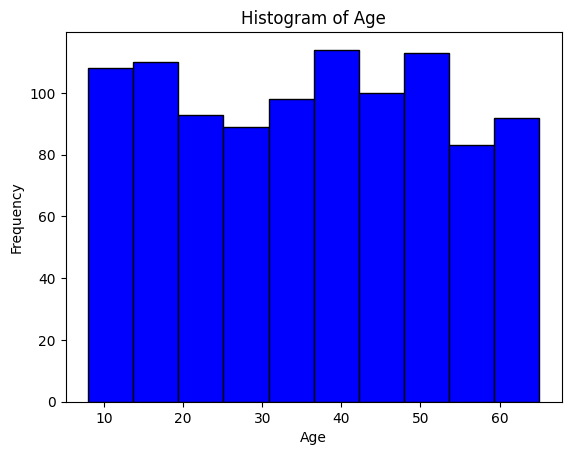

In [10]:
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

It can be seen that the frequency of people from any ages are almost similar. It can be said that the 'Age' column in the dataset is well balanced.

**Lets see the unique values of the columns.** 

In [12]:
unique_values_area = df['Area'].unique()
print("Unique values in the 'Area' column:")
print(unique_values_area)

Unique values in the 'Area' column:
['Mirpur' 'Chawkbazar' 'Paltan' 'Motijheel' 'Gendaria' 'Dhanmondi'
 'New Market' 'Sher-e-Bangla Nagar' 'Kafrul' 'Pallabi' 'Mohammadpur'
 'Shahbagh' 'Shyampur' 'Kalabagan' 'Bosila' 'Jatrabari' 'Adabor'
 'Kamrangirchar' 'Biman Bandar' 'Ramna' 'Badda' 'Bangshal' 'Sabujbagh'
 'Hazaribagh' 'Sutrapur' 'Lalbagh' 'Demra' 'Banasree' 'Cantonment'
 'Keraniganj' 'Tejgaon' 'Khilkhet' 'Kadamtali' 'Gulshan' 'Rampura'
 'Khilgaon']


In [13]:
unique_values_areatype = df['AreaType'].unique()
print("Unique values in the 'AreaType' column:")
print(unique_values_areatype)

Unique values in the 'AreaType' column:
['Undeveloped' 'Developed']


In [14]:
unique_values_district = df['District'].unique()
print("Unique values in the 'District' column:")
print(unique_values_district)

Unique values in the 'District' column:
['Dhaka']


In [15]:
unique_values_housetype = df['HouseType'].unique()
print("Unique values in the 'HouseType' column:")
print(unique_values_housetype)

Unique values in the 'HouseType' column:
['Building' 'Other' 'Tinshed']


In [16]:
area_counts = df['Area'].value_counts()
print("Count of each unique value in the 'Area' column:")
print(area_counts)

Count of each unique value in the 'Area' column:
Area
Jatrabari              38
Demra                  38
Mirpur                 34
Kadamtali              34
Dhanmondi              34
Bangshal               34
New Market             33
Keraniganj             33
Paltan                 31
Tejgaon                31
Sutrapur               31
Badda                  31
Rampura                30
Khilkhet               30
Ramna                  30
Biman Bandar           30
Banasree               29
Mohammadpur            28
Gulshan                28
Motijheel              27
Kalabagan              27
Kafrul                 26
Kamrangirchar          26
Hazaribagh             25
Bosila                 24
Shahbagh               24
Pallabi                23
Sher-e-Bangla Nagar    23
Khilgaon               23
Sabujbagh              23
Gendaria               22
Chawkbazar             22
Adabor                 22
Cantonment             20
Shyampur               19
Lalbagh                17
Name: coun

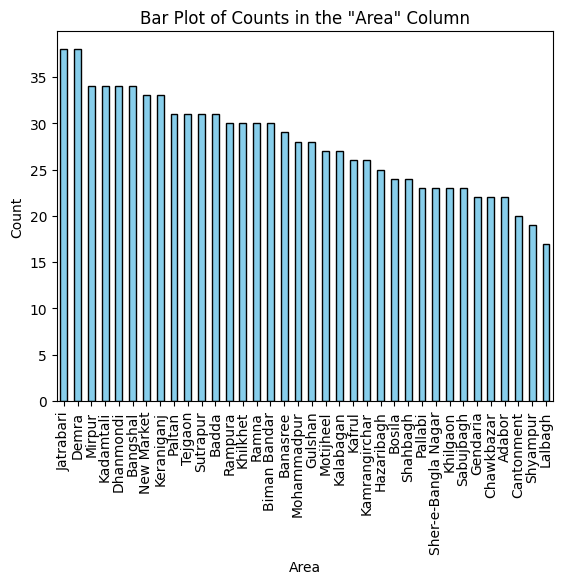

In [17]:
area_counts = df['Area'].value_counts()

# Bar Plot
area_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "Area" Column')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

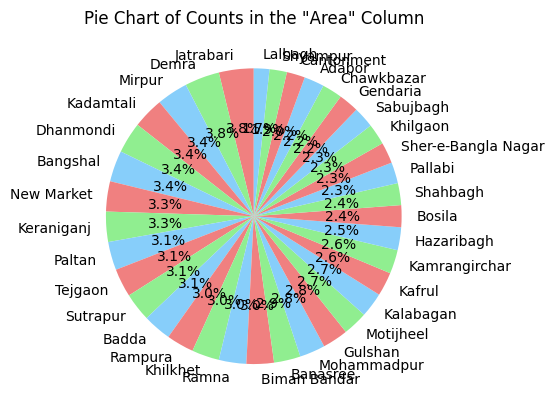

In [18]:
# Pie Chart
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Pie Chart of Counts in the "Area" Column')
plt.show()

In [19]:
areatype_counts = df['AreaType'].value_counts()
print("Count of each unique value in the 'AreaType' column:")
print(areatype_counts)

Count of each unique value in the 'AreaType' column:
AreaType
Developed      501
Undeveloped    499
Name: count, dtype: int64


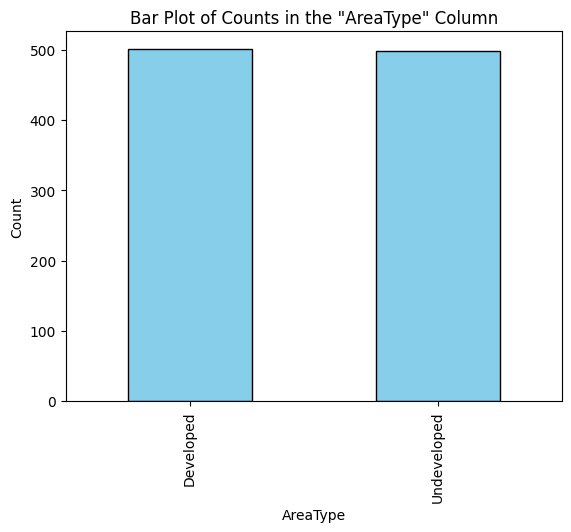

In [21]:
# Bar Plot
areatype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "AreaType" Column')
plt.xlabel('AreaType')
plt.ylabel('Count')
plt.show()

The dataset has recorded almost equal amount of area types. So it is good I must say.

In [22]:
housetype_counts = df['HouseType'].value_counts()
print("Count of each unique value in the 'housetype' column:")
print(housetype_counts)

Count of each unique value in the 'housetype' column:
HouseType
Building    354
Other       329
Tinshed     317
Name: count, dtype: int64


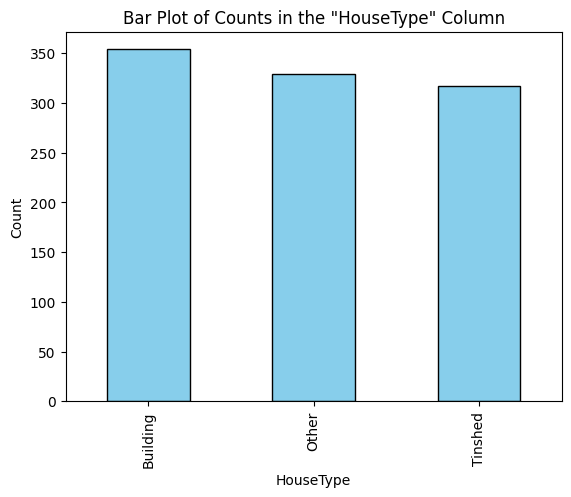

In [23]:
# Bar Plot
housetype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "HouseType" Column')
plt.xlabel('HouseType')
plt.ylabel('Count')
plt.show()

**Now we will see depending on Area, AreaType and HouseType how many people has been affected to Dengue or not. The dengue affected are shown as 1 and non-affected as 0**

In [24]:
area_outcome_counts = df.groupby(['Area', 'Outcome']).size().unstack()
print("Count of Dengue Affected (1) and Not Affected (0) based on the 'Area' column:")
print(area_outcome_counts)

Count of Dengue Affected (1) and Not Affected (0) based on the 'Area' column:
Outcome               0   1
Area                       
Adabor                8  14
Badda                14  17
Banasree             19  10
Bangshal             10  24
Biman Bandar         18  12
Bosila               13  11
Cantonment            8  12
Chawkbazar           11  11
Demra                12  26
Dhanmondi            17  17
Gendaria             13   9
Gulshan              14  14
Hazaribagh           13  12
Jatrabari             7  31
Kadamtali            15  19
Kafrul                9  17
Kalabagan            12  15
Kamrangirchar        16  10
Keraniganj           19  14
Khilgaon              9  14
Khilkhet             14  16
Lalbagh               7  10
Mirpur               15  19
Mohammadpur           8  20
Motijheel            12  15
New Market           19  14
Pallabi               9  14
Paltan               17  14
Ramna                20  10
Rampura              16  14
Sabujbagh             8  1

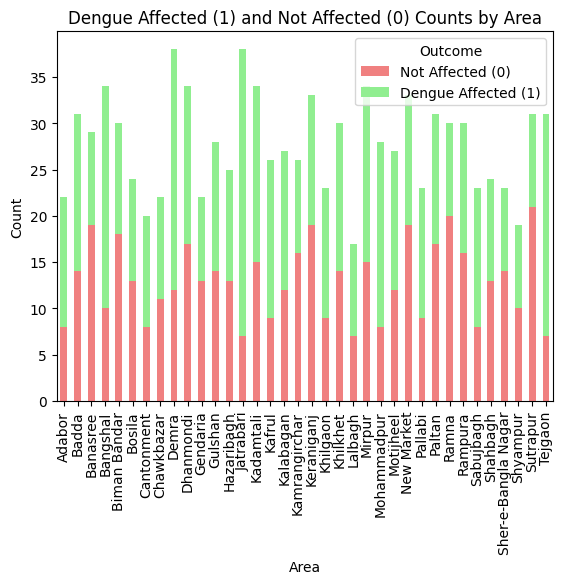

In [25]:
area_outcome_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Dengue Affected (1) and Not Affected (0) Counts by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Affected (0)', 'Dengue Affected (1)'], loc='upper right')
plt.show()

**Let us see the Dengue Affected people number greater than 15 from which areas**

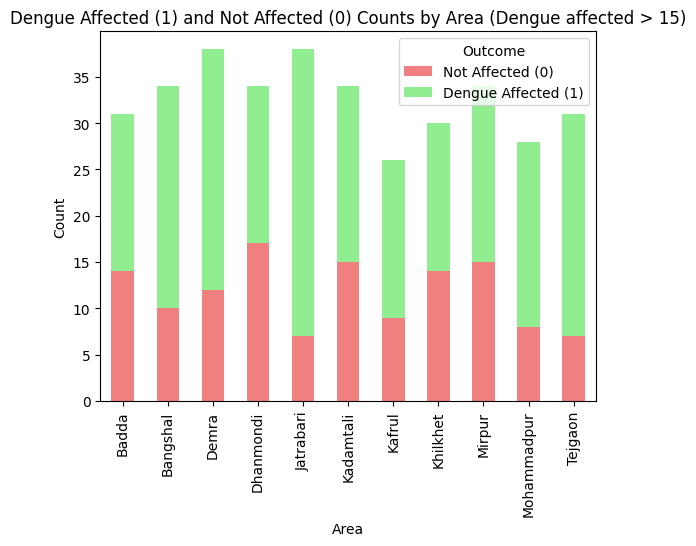

In [26]:
area_outcome_counts_filtered = area_outcome_counts[area_outcome_counts[1] > 15]
area_outcome_counts_filtered.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])


plt.title('Dengue Affected (1) and Not Affected (0) Counts by Area (Dengue affected > 15)')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Affected (0)', 'Dengue Affected (1)'], loc='upper right')
plt.show()

So there are 11 regions where the affected people number is greater than 15. They are: 
1. Badda
2. Bangshal
3. Demra
4. Dhanmondi
5. Jatrabari
6. Kadamtoli
7. Kafrul
8. Mirpur
9. Khilkhet
10. Mohammadpur
11. Tejgaon

**Now I want to find the type of the areas where Dengue affeted people are being found more. Is it developed or undeveloped area it makes a sense to predict the Dengue effectiveness**

In [27]:
dengue_affected_df = df[df['Outcome'] == 1]
area_areaType_counts = dengue_affected_df.groupby(['Area', 'AreaType']).size().unstack()
print("Count of Dengue Affected (1) people by Area and AreaType:")
print(area_areaType_counts)

Count of Dengue Affected (1) people by Area and AreaType:
AreaType             Developed  Undeveloped
Area                                       
Adabor                       6            8
Badda                        8            9
Banasree                     6            4
Bangshal                    11           13
Biman Bandar                 8            4
Bosila                       6            5
Cantonment                   7            5
Chawkbazar                   6            5
Demra                       14           12
Dhanmondi                   10            7
Gendaria                     5            4
Gulshan                      7            7
Hazaribagh                   4            8
Jatrabari                   17           14
Kadamtali                    9           10
Kafrul                       4           13
Kalabagan                    4           11
Kamrangirchar                5            5
Keraniganj                   6            8
Khilgaon          

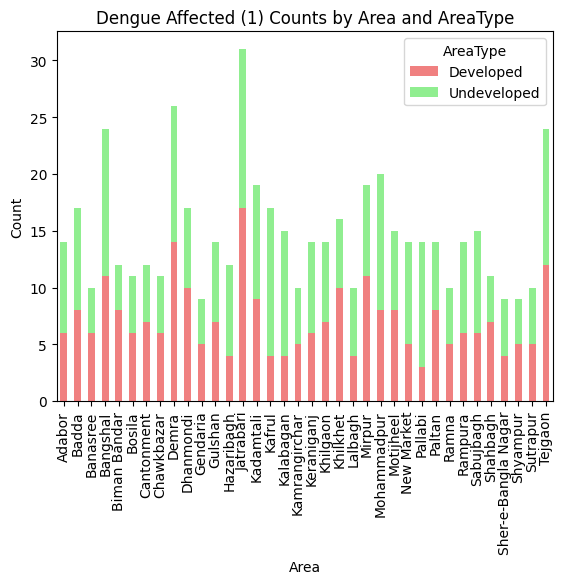

In [28]:
area_areaType_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Dengue Affected (1) Counts by Area and AreaType')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='AreaType', labels=['Developed', 'Undeveloped'], loc='upper right')
plt.show()

**So I can see that, even there are developed areas, but among them Jatrabari has the highest number of dengue patients in spite of being developed. I can also estimate that the areas of Jatrabari, Bongshal, Khilkhet and Demra have unhygienic environments**

In [31]:
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0})

In [32]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [33]:
df['Gender'] = df['Gender'].replace({'male': 1, 'Male': 1, 'female': 0, 'Female': 0})

In [34]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,1,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,0,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,0,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,1,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [38]:
df_copy = df.copy()

# Use one-hot encoding for the specified columns
df_copy = pd.get_dummies(df_copy, columns=['Area', 'AreaType', 'District', 'HouseType'], prefix=['Area', 'AreaType', 'District', 'HouseType'])

# Convert boolean values to integers (1s and 0s)
df_copy = df_copy.astype(int)

# Print the updated DataFrame with one-hot encoding and 1s/0s
print("DataFrame with one-hot encoding (1s and 0s):")
print(df_copy)


DataFrame with one-hot encoding (1s and 0s):
     Gender  Age  NS1  IgG  IgM  Outcome  Area_Adabor  Area_Badda  \
0         0   45    0    0    0        0            0           0   
1         1   17    0    0    1        0            0           0   
2         0   29    0    0    0        0            0           0   
3         0   63    1    1    0        1            0           0   
4         1   22    0    0    0        0            0           0   
..      ...  ...  ...  ...  ...      ...          ...         ...   
995       0   16    1    1    0        1            0           0   
996       1   41    1    1    0        1            0           0   
997       1   45    0    0    1        0            0           0   
998       0   19    1    1    1        1            0           0   
999       0   28    0    0    1        0            1           0   

     Area_Banasree  Area_Bangshal  ...  Area_Sher-e-Bangla Nagar  \
0                0              0  ...                    

In [39]:
df_copy.head()

,Gender,Age,NS1,IgG,IgM,Outcome,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,District_Dhaka,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,1,17,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,63,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [41]:
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

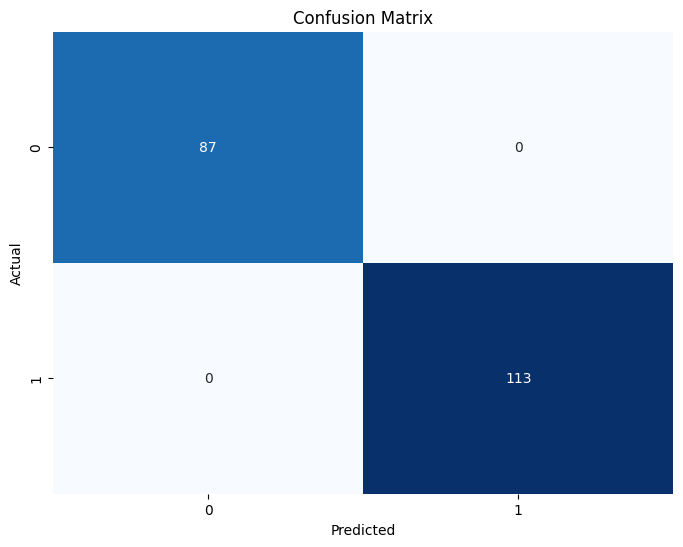

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()